In [7]:
from arcgis.gis import GIS
from credential import Arcgis_id

In [8]:
gis = GIS("https://utoronto.maps.arcgis.com", client_id = Arcgis_id)
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest//oauth2/authorize?response_type=code&client_id=fioWa2RXNLQcPGob&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=7WSbXKzNbn6ZrYZp5r5Ftvl9nVWoLv
Enter code obtained on signing in using SAML: ········
Successfully logged in as: wangy216_utoronto


D:\Anaconda\software\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'utoronto.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [9]:
user = gis.users.get('john.smith')

In [26]:
toronto_map = gis.map("Toronto, Ontario")
toronto_map

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
toronto_map.zoom

10.0

In [24]:
toronto_map.rotation

0.0

In [25]:
toronto_map.rotation = 17.5
toronto_map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [27]:
toronto_map.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': -8837146.757199967,
 'y': 5411286.851528973}

In [28]:
toronto_map.basemap

'default'

In [29]:
toronto_map.extent

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8912360.793032609,
 'ymin': 5380712.040214892,
 'xmax': -8761932.721367326,
 'ymax': 5441861.662843055}

In [41]:
toronto_map.basemap = ('dark-gray')
toronto_map.mode = "3D"
toronto_map.zoom = 4
toronto_map.tilt = 1
toronto_map.heading = 0
toronto_map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), mode='3D', ready=True)

In [42]:
items = gis.content.search('', 'feature layer')
for item in items:
    print(item)

<Item title:"residential_renovation_points_yorkville_chengxili_1003098113" type:Feature Layer Collection owner:lichen43_utoronto>
<Item title:"NR DocumentedLocations" type:Feature Layer Collection owner:rashid56_utoronto>
<Item title:"2016Energy" type:Feature Layer Collection owner:leungji6_utoronto>
<Item title:"TOWards SI" type:Feature Layer Collection owner:ilanges4_utoronto>
<Item title:"Bicycle Parking Racks Data" type:Feature Layer Collection owner:bhattja1_utoronto>
<Item title:"_UTSC_Tian" type:Feature Layer Collection owner:gis.maps>
<Item title:"NovaScotia_places_zhuang51_v1" type:Feature Layer Collection owner:zhuang51_utoronto>
<Item title:"Bike_Lanes_MB1" type:Feature Layer Collection owner:obnamiaj_utoronto>
<Item title:"kannann2_SuitableSites" type:Feature Layer Collection owner:kannann2_utoronto>
<Item title:"Transmission_Lines_10_Mi_Zone_THM" type:Feature Layer Collection owner:tuhuimin_utoronto>


In [44]:
items = gis.content.search('owner:macdo925_utoronto', 'feature layer')
for item in items:
    print(item)
    for lyr in item.layers:
        print(lyr.properties.name)

<Item title:"RSM8431 Toronto Neighbourhoods" type:Feature Layer Collection owner:macdo925_utoronto>
toronto_neighbourhoods
<Item title:"utoronto" type:Feature Layer Collection owner:macdo925_utoronto>
utoronto
<Item title:"Crime2018" type:Feature Layer Collection owner:macdo925_utoronto>
Crime2018


In [45]:
map1 = gis.map("Toronto, ON")

In [66]:
# Reset the map widget
map1 = gis.map('Toronto, ON')

# Get the first item - the crimes in Toronto in 2018
crime_locations = items[2]

# Get the sencond item - the toronto neighbourhoods
toronto_neighbourhoods = items[0]

# Add teh neighbourhoods to the map
map1.add_layer(toronto_neighbourhoods)

# Get the thrid item - the university location
university_location = items[1]

# Add the crimes layer to the map
map1.add_layer(crime_locations)

# Add the university of Toronto to the map
map1.add_layer(university_location)

# Set the extent to be the spatial envelop of the neighbourhoods
map1.extext = toronto_neighbourhoods.extent

map1

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"RSM8431 Toronto Neighbourhoods" type:Feature Layer Collection owner:macdo925_utoronto>
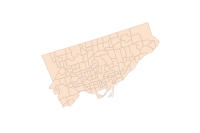

In [52]:
items[0]

<Item title:"utoronto" type:Feature Layer Collection owner:macdo925_utoronto>
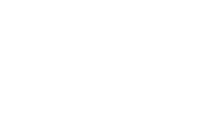

In [53]:
items[1]

<Item title:"Crime2018" type:Feature Layer Collection owner:macdo925_utoronto>
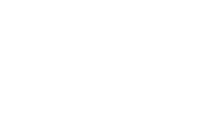

In [55]:
items[2]

In [70]:
# Let's evaluate what fields exist within our data layers
for field in crime_locations.layers[0].properties.fields:
    print(field['name'])

FID
Index_
event_uniq
occurrence
reportedda
premisetyp
ucr_code
ucr_ext
offence
reportedye
reportedmo
reported_1
reported_2
reported_3
reportedho
occurren_1
occurren_2
occurren_3
occurren_4
occurren_5
occurren_6
MCI
Division
Hood_ID
Neighbourh
Lat
Long
ObjectId
Crimes


In [71]:
crime_featurelayer = crime_locations.layers[0]
crime_featureset = crime_featurelayer.query()
print(crime_featureset.geometry_type)

esriGeometryPoint


In [73]:
crime_featureset.sdf

,FID,Index_,event_uniq,occurrence,reportedda,premisetyp,ucr_code,ucr_ext,offence,reportedye,...,occurren_6,MCI,Division,Hood_ID,Neighbourh,Lat,Long,ObjectId,Crimes,SHAPE
0,1,16259,GO-201881815,2018-01-14T01:12:00.000Z,2018-01-14T01:12:00.000Z,Outside,1420,100,Assault With Weapon,2018,...,1,Assault,D51,75,Church-Yonge Corridor (75),43.654957,-79.375877,15010,1,"{""x"": -8836082.253406385, ""y"": 5412200.2968903..."
1,2,16260,GO-2018129259,2018-01-21T13:18:00.000Z,2018-01-21T13:25:00.000Z,Commercial,1610,210,Robbery - Business,2018,...,13,Robbery,D11,86,Roncesvalles (86),43.640335,-79.437920,15011,1,"{""x"": -8842988.759516694, ""y"": 5409950.8713296..."
2,3,16261,GO-2018134696,2018-01-21T15:00:00.000Z,2018-01-22T11:21:00.000Z,House,2120,200,B&E,2018,...,15,Break and Enter,D42,132,Malvern (132),43.802563,-79.232048,15012,1,"{""x"": -8820071.237892143, ""y"": 5434938.9707084..."
3,4,16262,GO-2018178024,2018-01-29T00:59:00.000Z,2018-01-29T00:59:00.000Z,Commercial,2120,200,B&E,2018,...,0,Break and Enter,D55,121,Oakridge (121),43.691235,-79.288361,15013,1,"{""x"": -8826339.92778782, ""y"": 5417783.69801374..."
4,5,16263,GO-2018178024,2018-01-29T00:59:00.000Z,2018-01-29T00:59:00.000Z,Commercial,1420,100,Assault With Weapon,2018,...,0,Assault,D55,121,Oakridge (121),43.691235,-79.288361,15014,1,"{""x"": -8826339.92778782, ""y"": 5417783.69801374..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36298,36299,172717,GO-2018926482,2018-05-22T22:00:00.000Z,2018-05-23T08:55:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,2018,...,22,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.672337,-79.495255,159934,1,"{""x"": -8849371.251410026, ""y"": 5414874.7456681..."
36299,36300,172718,GO-2018517812,2018-03-21T18:00:00.000Z,2018-03-22T08:44:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,2018,...,18,Auto Theft,D32,35,Westminster-Branson (35),43.781944,-79.450424,159935,1,"{""x"": -8844380.765222078, ""y"": 5431759.3382555..."
36300,36301,172719,GO-2018683950,2018-04-16T22:30:00.000Z,2018-04-17T07:58:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,2018,...,22,Auto Theft,D32,39,Bedford Park-Nortown (39),43.737354,-79.429192,159936,1,"{""x"": -8842017.163045857, ""y"": 5424886.7128086..."
36301,36302,172720,GO-2018933022,2018-05-23T22:00:00.000Z,2018-05-24T07:26:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,2018,...,22,Auto Theft,D13,102,Forest Hill North (102),43.702938,-79.437836,159937,1,"{""x"": -8842979.41986125, ""y"": 5419585.66699644..."
